In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
paisescovid19 = pd.read_csv('countries-aggregated_csv.csv')
covid19 = pd.read_csv('worldwide-aggregate_csv.csv')

In [7]:
print ('\n** Análisis de los datos **\n')
print('El Dataset "covid19" contiene {0} filas y {1} columnas'.format(covid19.shape[0], (covid19.shape[1])))
print('El Dataset "paisescovid19" contiene {0} filas y {1} columnas'.format(paisescovid19.shape[0], (paisescovid19.shape[1])))
print('Así mismo hay {0} paises distintos y'.format(df_c19.shape[0]));print( '{0} fechas distintas'.format(df_c19.shape[0]))


** Análisis de los datos **

El Dataset "covid19" contiene 733 filas y 5 columnas
El Dataset "paisescovid19" contiene 143668 filas y 5 columnas
Así mismo hay 733 paises distintos y
733 fechas distintas


In [3]:
print ('\n** Datos por fecha **\n')
covid19.head()
print(covid19.max())


** Datos por fecha **

Date             2022-01-23
Confirmed         351069733
Recovered         130899061
Deaths              5595986
Increase rate      90.57055
dtype: object


In [6]:
df_c19 = covid19.groupby(by = ["Date"]).count()


In [4]:
print ('\n** Datos por país **\n')
paisescovid19.head()
print(paisescovid19.max())


** Datos por país **

Date         2022-01-23
Country        Zimbabwe
Confirmed      70699416
Recovered      30974748
Deaths           866540
dtype: object


In [8]:
df_pc = paisescovid19.groupby(by = ["Country"]).count()

In [9]:
print ('\n** Análisis exploratorio **\n')
print(paisescovid19.columns)
print(covid19.columns)
print('Definiciones: \n1. Date: día de actualización \n2. Country: país de donde se obtienen las cifras \n3. Confirmed: número de personas confirmadas con coronavirus \n4. Recovered: número de personas que se han recuperado de coronavirus \n5. Deaths: número de personas que han muerto por coronavirus \n6. Increase rate: tasa a la que progresa el número de infecciones')


** Análisis exploratorio **

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')
Index(['Date', 'Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')
Definiciones: 
1. Date: día de actualización 
2. Country: país de donde se obtienen las cifras 
3. Confirmed: número de personas confirmadas con coronavirus 
4. Recovered: número de personas que se han recuperado de coronavirus 
5. Deaths: número de personas que han muerto por coronavirus 
6. Increase rate: tasa a la que progresa el número de infecciones


In [10]:
print(covid19.groupby(['Date', 'Deaths'])['Deaths'].count())

graf_c19 = covid19.groupby(['Date'])['Deaths',].mean()

Date        Deaths 
2020-01-22  17         1
2020-01-23  18         1
2020-01-24  26         1
2020-01-25  42         1
2020-01-26  56         1
                      ..
2022-01-19  5566894    1
2022-01-20  5576126    1
2022-01-21  5585823    1
2022-01-22  5591704    1
2022-01-23  5595986    1
Name: Deaths, Length: 733, dtype: int64


Text(0, 0.5, 'Millones de nuertes')

<Figure size 10000x10000 with 0 Axes>

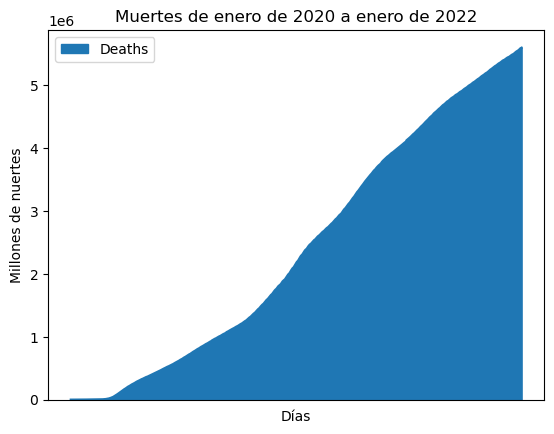

In [21]:
fig = plt.figure(figsize=(100,100))
graf_c19.plot(kind='area')
plt.xticks(range(0))
plt.title("Muertes de enero de 2020 a enero de 2022")
plt.xlabel("Días")
plt.ylabel("Millones de muertes")

In [12]:
print(covid19.groupby(['Date', 'Confirmed'])['Confirmed'].count())

graf_confirmed = covid19.groupby(['Date'])['Confirmed',].mean()

Date        Confirmed
2020-01-22  557          1
2020-01-23  655          1
2020-01-24  941          1
2020-01-25  1434         1
2020-01-26  2118         1
                        ..
2022-01-19  339002398    1
2022-01-20  342581803    1
2022-01-21  346464304    1
2022-01-22  349134552    1
2022-01-23  351069733    1
Name: Confirmed, Length: 733, dtype: int64


Text(0, 0.5, 'Millones de casos confirmados')

<Figure size 10000x10000 with 0 Axes>

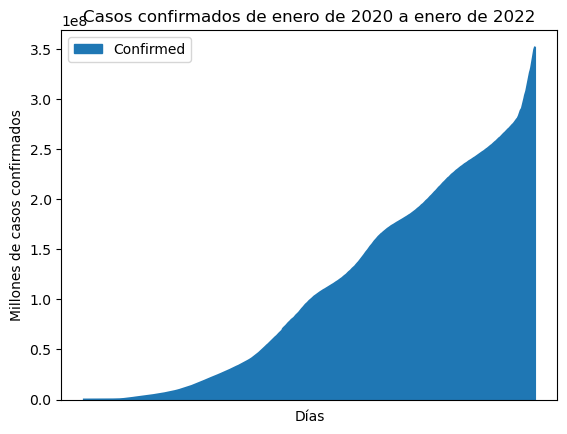

In [22]:
fig = plt.figure(figsize=(100,100))
graf_confirmed.plot(kind='area')
plt.xticks(range(0))
plt.title("Casos confirmados de enero de 2020 a enero de 2022")
plt.xlabel("Días")
plt.ylabel("Millones de casos confirmados")

In [25]:
covid = "https://jsanjay63.github.io/covid19-geoextractor/output/covid19_time_series.geojson"
map_data = gpd.read_file(covid)
map_data.head()

,id,iso,name,dates,current_confirmed,current_recovered,current_deaths,geometry
0,Afghanistan,AFG,Afghanistan,"{'2020-1-22': {'confirmed': 422115, 'recovered...",438700,49333,17937,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,Angola,AGO,Angola,"{'2020-1-22': {'confirmed': 220266, 'recovered...",224803,19322,4341,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,Albania,ALB,Albania,"{'2020-1-22': {'confirmed': 651168, 'recovered...",713121,69773,8863,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,United Arab Emirates,ARE,United Arab Emirates,"{'2020-1-22': {'confirmed': 2142398, 'recovere...",2323514,381230,5871,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,Argentina,ARG,Argentina,"{'2020-1-22': {'confirmed': 19670577, 'recover...",21052146,1905021,308580,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


<AxesSubplot:title={'center':'Número de muertes por Covid-19 en 2020'}, xlabel=' ', ylabel=' '>

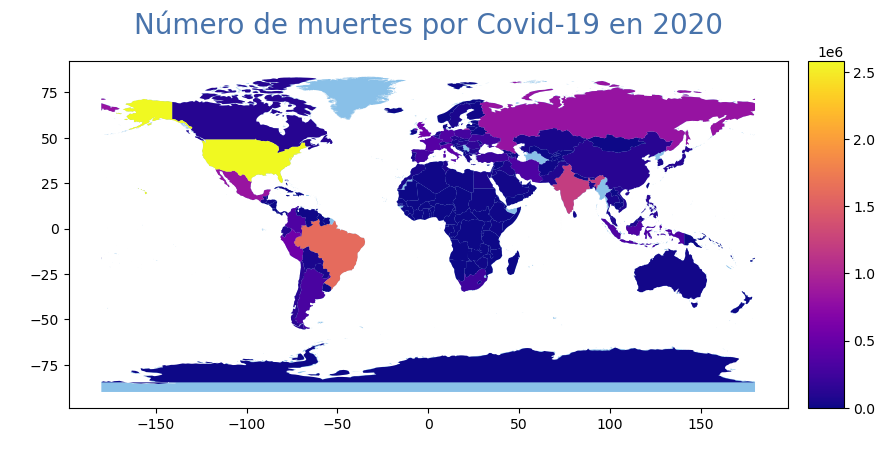

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Número de muertes por Covid-19 en 2020', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel(' ')
ax.set_ylabel(' ')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
map_data.plot(column='current_deaths', cmap='plasma', ax=ax,  legend=True, cax=cax, zorder=5)
mundo = "Paises_Mundo.shx"
map_mundo = gpd.read_file(mundo)
map_mundo.head()
map_mundo.plot(ax=ax, color='#89c0e8', zorder=0)
